# Analysis of Prosper Loan Data
## by Temitope Bimbo Babatola

## Introduction
Prosper is a loan company. Featuring fixed interest online loans and credit cards with next-day approval and flexible terms.
This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. 


## Objective
My main objective is to understand the parameters that determine how prosperratings are assigned to loan applications.

## Preliminary Wrangling

### [Data Dictionary](https://www.google.com/url?q=https://docs.google.com/spreadsheet/ccc?key%3D0AllIqIyvWZdadDd5NTlqZ1pBMHlsUjdrOTZHaVBuSlE%26usp%3Dsharing&sa=D&source=editors&ust=1658968675093293&usg=AOvVaw0ryVo6UaE5Dlan_0VIII3d)

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [4]:
loan_data = pd.read_csv('prosperLoanData.csv')
loan_data.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN

### Data Structure

In [5]:
print(f"""The dataset has:
            {loan_data.shape[0]} rows
            {loan_data.shape[1]} columns
       """)

The dataset has:
            113937 rows
            81 columns
       


In [6]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [7]:
loan_data.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,StatedMonthlyIncome,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,113937.000000,106312.000000,113346.000000,113346.000000,106333.000000,106333.000000,113240.000000,113937.00000,113937.000000,113240.000000,112778.000000,113240.000000,106315.000000,112947.000000,113240.000000,106333.000000,1.063330e+05,106333.000000,106393.000000,106393.000000,106393.000000,106393.000000,105383.000000,1.139370e+05,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,18928.000000,113937.000000,16952.000000,113937.000000,113937.000000,113937.00000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,2.774209,96.071582,685.567731,704.567731,10.317192,9.260164,26.754539,6.96979,398.292161,1.435085,5.584405,0.592052,984.507059,4.154984,0.312646,0.015094,1.759871e+04,0.561309,11210.225447,23.230034,0.885897,0.802327,0.275947,5.608026e+03,1.421100,22.934345,22.271949,0.613629,0.048540,8472.311961,2930.313906,-3.223214,152.816539,16.268464,31.896882,69444.474271,8337.01385,272.475783,4183.079489,3105.536588,1077.542901,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,3.996797,94.480605,66.458275,66.458275,5.457866,5.022644,13.637871,4.63097,447.159711,2.437507,6.429946,1.978707,7158.270157,10.160216,0.727868,0.154092,3.293640e+04,0.317918,19818.361309,11.871311,0.148179,1.097637,0.551759,7.478497e+03,0.764042,19.249584,18.830425,2.446827,0.556285,7395.507650,3806.635075,50.063567,466.320254,9.005898,29.974184,38930.479610,6245.80058,192.697812,4790.907234,4069.527670,1183.414168,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,0.000000,0.000000,0.000000,19.000000,0.000000,0.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-209.000000,0.000000,0.000000,0.000000,1.000000,1000.00000,0.000000,-2.349900,0.000000,-2.349900,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000

In [8]:
#count of missing values
loan_data.isnull().sum() 

ListingKey                                  0
ListingNumber                               0
ListingCreationDate                         0
CreditGrade                             84984
Term                                        0
LoanStatus                                  0
ClosedDate                              58848
BorrowerAPR                                25
BorrowerRate                                0
LenderYield                                 0
EstimatedEffectiveYield                 29084
EstimatedLoss                           29084
EstimatedReturn                         29084
ProsperRating (numeric)                 29084
ProsperRating (Alpha)                   29084
ProsperScore                            29084
ListingCategory (numeric)                   0
BorrowerState                            5515
Occupation                               3588
EmploymentStatus                         2255
EmploymentStatusDuration                 7625
IsBorrowerHomeowner               

In [9]:
#percent of missing values
(loan_data.isnull().sum() / loan_data.shape[0]) * 100

ListingKey                              0.000000
ListingNumber                           0.000000
ListingCreationDate                     0.000000
CreditGrade                            74.588588
Term                                    0.000000
LoanStatus                              0.000000
ClosedDate                             51.649596
BorrowerAPR                             0.021942
BorrowerRate                            0.000000
LenderYield                             0.000000
EstimatedEffectiveYield                25.526387
EstimatedLoss                          25.526387
EstimatedReturn                        25.526387
ProsperRating (numeric)                25.526387
ProsperRating (Alpha)                  25.526387
ProsperScore                           25.526387
ListingCategory (numeric)               0.000000
BorrowerState                           4.840394
Occupation                              3.149109
EmploymentStatus                        1.979164
EmploymentStatusDura

### Main features of interest in the dataset
- LoanStatus
- ProsperScore 
- ProsperRating (numeric) - (only available for data after 2009)
- ProsperRating (Alpha)
- BorrowerAPR
- BorrowerRate



### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
- Term
- Occupation
- EmploymentStatus
- IsBorrowerHomeowner
- CreditScoreRangeLower
- CreditScoreRangeUpper
- IncomeRange
- LoanOriginalAmount

In [10]:
loan_data_subset =loan_data[[ 'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 
                              'BorrowerRate', 'ProsperRating (numeric)', 'ProsperRating (Alpha)', 
                              'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState', 'Occupation',
                              'EmploymentStatus', 'IsBorrowerHomeowner',
                              'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'IncomeRange', 
                              'LoanOriginalAmount', 'LoanOriginationDate',
                              'LoanCurrentDaysDelinquent' ]]

In [11]:
loan_data_subset.head()

,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,IsBorrowerHomeowner,CreditScoreRangeLower,CreditScoreRangeUpper,IncomeRange,LoanOriginalAmount,LoanOriginationDate,LoanCurrentDaysDelinquent
0,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,NaN,NaN,NaN,0,CO,Other,Self-employed,True,640.0,659.0,"$25,000-49,999",9425,2007-09-12 00:00:00,0
1,36,Current,NaN,0.12016,0.0920,6.0,A,7.0,2,CO,Professional,Employed,False,680.0,699.0,"$50,000-74,999",10000,2014-03-03 00:00:00,0
2,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,NaN,NaN,NaN,0,GA,Other,Not available,False,480.0,499.0,Not displayed,3001,2007-01-17 00:00:00,0
3,36,Current,NaN,0.12528,0.0974,6.0,A,9.0,16,GA,Skilled Labor,Employed,True,800.0,819.0,"$25,000-49,999",10000,2012-11-01 00:00:00,0
4,36,Current,NaN,0.24614,0.2085,3.0,D,4.0,2,MN,Executive,Employed,True,680.0,699.0,"$100,000+",15000,2013-09-20 00:00:00,0


In [12]:
(loan_data_subset.isnull().sum() / loan_data_subset.shape[0]) * 100

Term                          0.000000
LoanStatus                    0.000000
ClosedDate                   51.649596
BorrowerAPR                   0.021942
BorrowerRate                  0.000000
ProsperRating (numeric)      25.526387
ProsperRating (Alpha)        25.526387
ProsperScore                 25.526387
ListingCategory (numeric)     0.000000
BorrowerState                 4.840394
Occupation                    3.149109
EmploymentStatus              1.979164
IsBorrowerHomeowner           0.000000
CreditScoreRangeLower         0.518708
CreditScoreRangeUpper         0.518708
IncomeRange                   0.000000
LoanOriginalAmount            0.000000
LoanOriginationDate           0.000000
LoanCurrentDaysDelinquent     0.000000
dtype: float64

## Univariate Exploration

In [13]:
def barchart(df, col):
    """ 
    INPUTS:
        df: the data frame
        col: the y value to plot
    """
    plot_df = df[col].value_counts()
    plot_df = plot_df.reset_index()
    sns.set(rc={'figure.figsize':(10.7,8.27)})
    sns.barplot(y='index', x=col, data=plot_df, orient='h', color='blue')
    plt.ylabel(col.title(), fontsize=13, weight=("bold"))
    plt.xlabel('Count', fontsize=13, weight=("bold"))
    plt.title(f'Distribution of {col.title()}', fontsize=16, weight=("bold"))

In [14]:
# creating a fuction for ploting my histigram for univariate plots.
def histogram(df, col, bin_size):
    '''
    INPUTS:
        df: the data frame
        col: the x value to plot
        bin: the bin size one need for ploting
    '''
    plt.figure(figsize = [12, 6])
    plt.hist(data = df, x = col, bins = bin_size, color='blue');
    plt.title(f'''{col} distribution'''.title(),fontsize=13, weight=("bold"))
    plt.ylabel('Count'.title(),fontsize=10, weight=("bold"))
    plt.xlabel(col.title(),fontsize=10, weight=("bold"))

**Loan Status**

What is the distribution of loan status in the data?

In [15]:
loan_data_subset['LoanStatus'].value_counts(normalize=True)*100

Current                   49.655511
Completed                 33.416713
Chargedoff                10.525115
Defaulted                  4.404188
Past Due (1-15 days)       0.707408
Past Due (31-60 days)      0.318597
Past Due (61-90 days)      0.274713
Past Due (91-120 days)     0.266814
Past Due (16-30 days)      0.232585
FinalPaymentInProgress     0.179924
Past Due (>120 days)       0.014043
Cancelled                  0.004388
Name: LoanStatus, dtype: float64

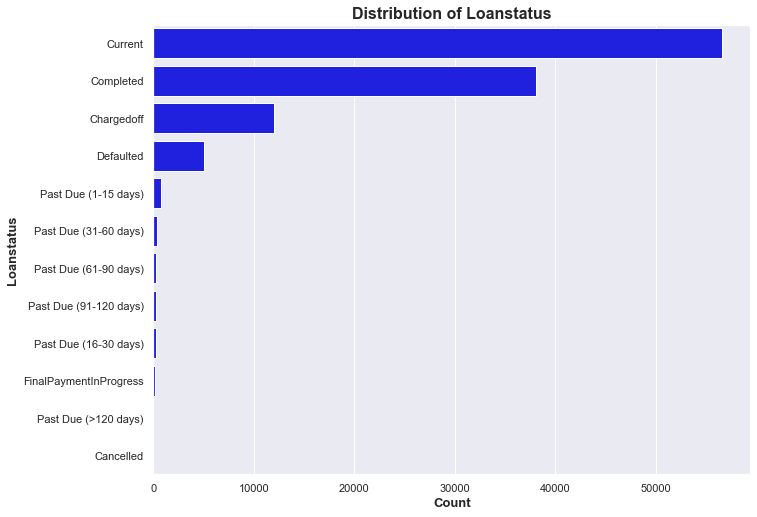

In [16]:
barchart(loan_data_subset, 'LoanStatus')

Most of the loans in the data are current/active loans, followed by completed loans

**Borrower APR**

What is the distribution of borrowerAPR?

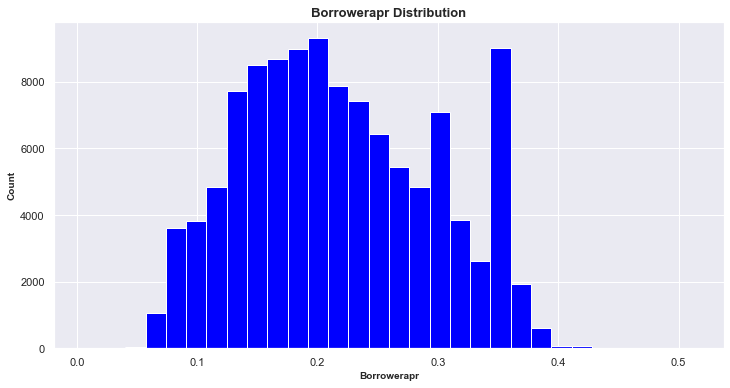

In [17]:
histogram(loan_data_subset, 'BorrowerAPR', 30)

The plot shows that the 'BorrowerAPR' is a multimodal plot.

**Distribution of BorrowerRate**

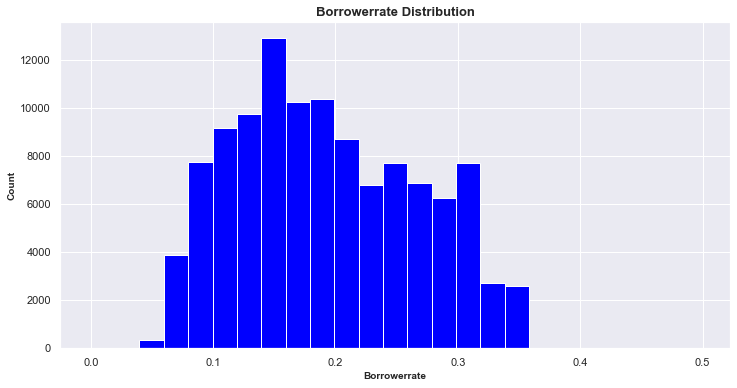

In [18]:
histogram(df=loan_data_subset, col='BorrowerRate', bin_size=25)

The borrowerrate has a very similar distribution as the borrowerAPR because the APR is made up of the borrowerrate and other fees.

**ProsperRating Distribution**

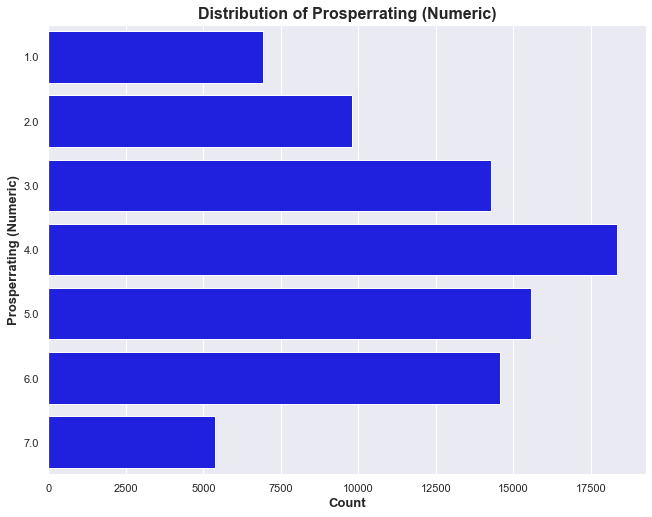

In [19]:
barchart(loan_data_subset, 'ProsperRating (numeric)')

The highest rating score (7) is the least popular in the data, which means it's not easily awarded. The most common rating values are the median values (especially 4)

**ProsperScore Distribution**

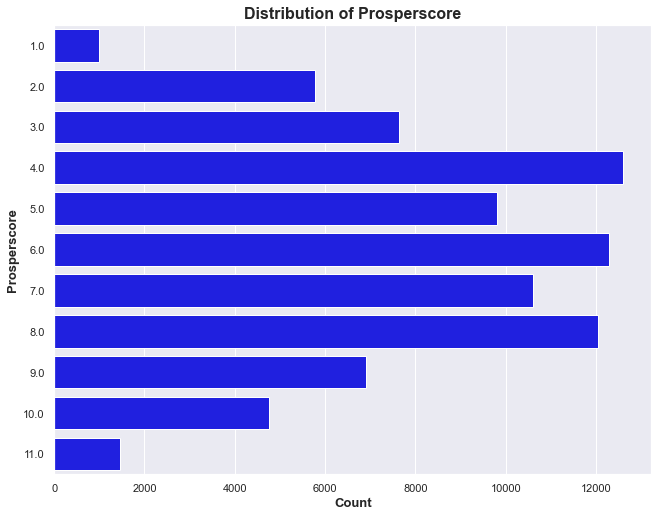

In [20]:
barchart(loan_data_subset, 'ProsperScore')

There are different peaks in the prosper score column, mostly on the lower risk side.

**Distribution of Loan Amount**

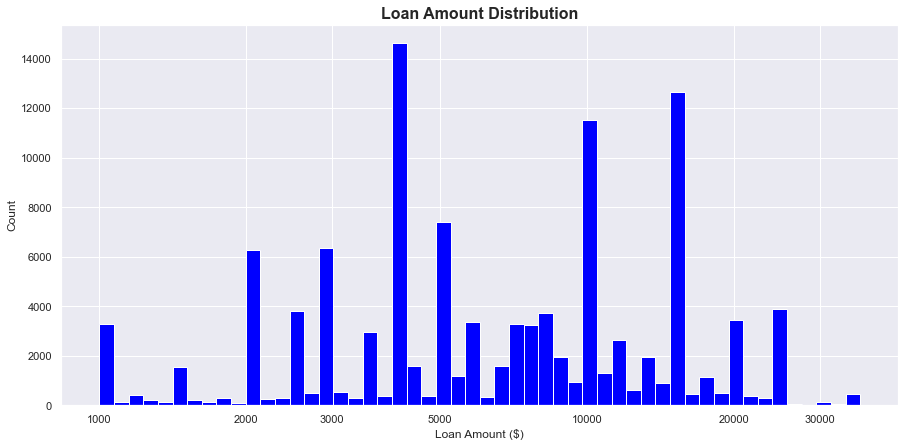

In [21]:
bins = 10 ** np.arange(3, np.log10(loan_data_subset['LoanOriginalAmount'].max())+0.03, 0.03)
plt.figure(figsize = [15, 7])
plt.hist(data = loan_data_subset, x = 'LoanOriginalAmount', bins = bins, color='blue');
ticks = [1000,2000,3000,5000,10000,20000,30000]
labels = ['{}'.format(v) for v in ticks]
plt.xscale('log')
plt.xlabel('Loan Amount ($)')
plt.ylabel('Count')
plt.title('Loan Amount Distribution', fontsize=16, weight='bold')
plt.xticks(ticks, labels);

In [22]:
loan_data_subset['LoanOriginalAmount'].max()

35000

In [23]:
loan_data_subset['LoanOriginalAmount'].min()

1000

The amount of loan borrowers apply for/get is very widely distributed from 1000 (lowest) to 35000 (highest)

## Bivariate Exploration

**Average borrower APR distribution by year**

In [24]:
#convert loan start date to datetime object
loan_data_subset['LoanOriginationDate'] = pd.to_datetime(loan_data_subset['LoanOriginationDate'])

Text(0.5, 1.0, 'Average Borrower APR distribution by Year')

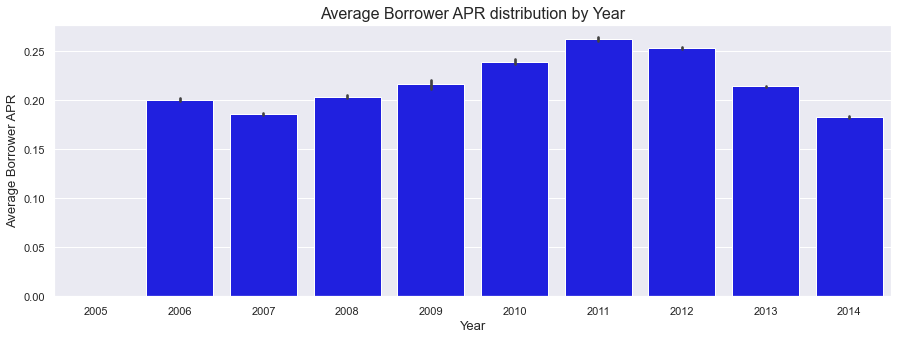

In [25]:
loan_data_subset['year']= loan_data_subset['LoanOriginationDate'].dt.year
plt.figure(figsize = [15, 5])
sns.barplot(data=loan_data_subset, x='year', y='BorrowerAPR', color='blue')
plt.ylabel('Average Borrower APR', fontsize=13)
plt.xlabel('Year', fontsize=13)
plt.title('Average Borrower APR distribution by Year', fontsize=16)

The avg borrower APR reached a peak in 2011 and dropped steadily from then to 2014. The lowest avg APR was recorded in 2007.

**Average borrower APR distribution by Month**

Text(0.5, 1.0, 'Average Borrower APR distribution by Month')

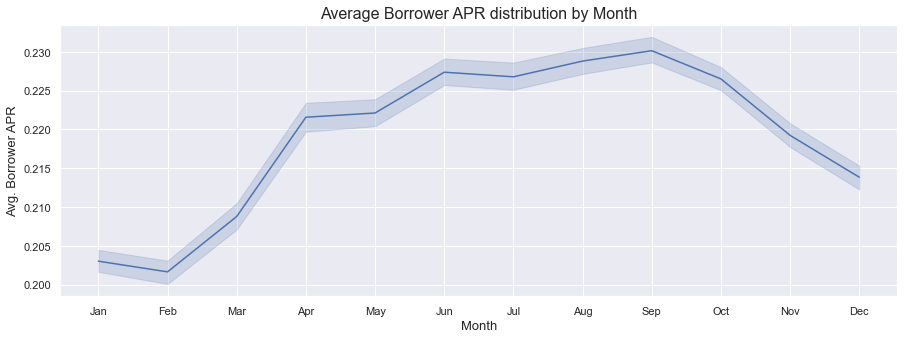

In [26]:
loan_data_subset['month']= loan_data_subset['LoanOriginationDate'].dt.strftime('%b')
month_order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
month_order = pd.api.types.CategoricalDtype(ordered=True, categories=month_order)
loan_data_subset['month'] = loan_data_subset['month'].astype(month_order)
plt.figure(figsize = [15, 5])
sns.lineplot(data=loan_data_subset,x='month',y='BorrowerAPR')
plt.ylabel('Avg. Borrower APR', fontsize=13)
plt.xlabel('Month', fontsize=13)
plt.title('Average Borrower APR distribution by Month', fontsize=16)

Avg APR is very low in the first quarter of the year, and increases steadily and reaches a peak in September.

**Relationship between BorrowerRate, BorrowerAPR, LoanOriginalAmount, IncomeRange and Prosper Score**

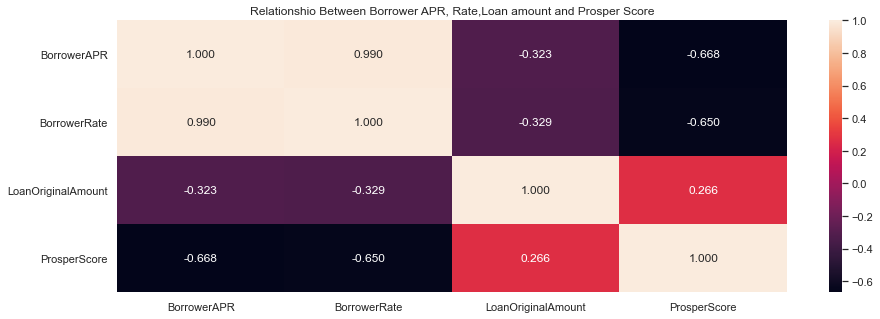

In [27]:
features = ['BorrowerAPR','BorrowerRate','LoanOriginalAmount','ProsperScore']
plt.figure(figsize = [15, 5])
sns.heatmap(loan_data_subset[features].corr(), annot = True, fmt = '.3f')
plt.title('Relationshio Between Borrower APR, Rate,Loan amount and Prosper Score');

BorrowerAPR and Borrowerrate are strongly correlated (borrowerAPR is made up of borrowerRate and other fees)

**Effect of Prosper Rating and Prosper Score on Borrower APR**

In [28]:
#binning the loan amount into different categories
loan_data_subset['LoanAmount_bin'] = pd.cut(loan_data_subset['LoanOriginalAmount'],
                                            bins=[1000,5000, 10000, 15000, 20000, 25000, 30000, 35000],
                                        labels=['1k-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])

Text(0.5, 1.0, 'Relationship between ProsperRating and BorrowerAPR')

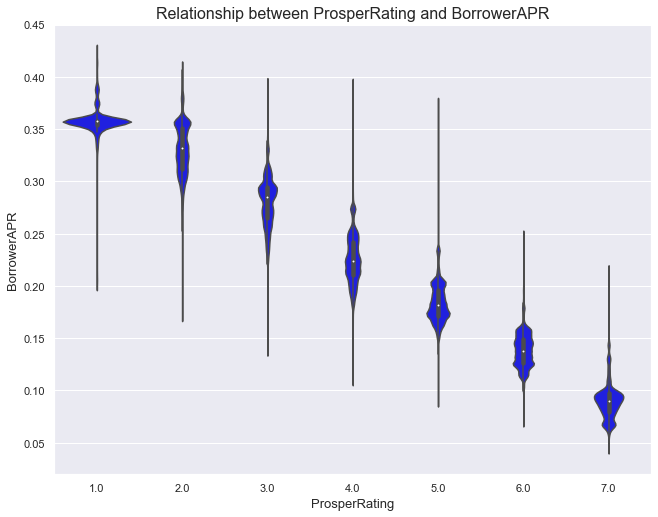

In [29]:
sns.violinplot(data=loan_data_subset, x='ProsperRating (numeric)', y='BorrowerAPR', color='blue');
plt.xlabel('ProsperRating', fontsize=13)
plt.ylabel('BorrowerAPR', fontsize=13)
plt.title('Relationship between ProsperRating and BorrowerAPR', fontsize=16)

The violin plot above shows that the higher the ratings, the lower the borrower APR. 
To have good rating, APR must be below 0.1%.

## Multivariate Exploration

**Effect of the loan term on the loan and Borrower APR**

Text(0.5, 1.0, 'Relationship between LoanTerm, BorrowerAPR and Loan Amount')

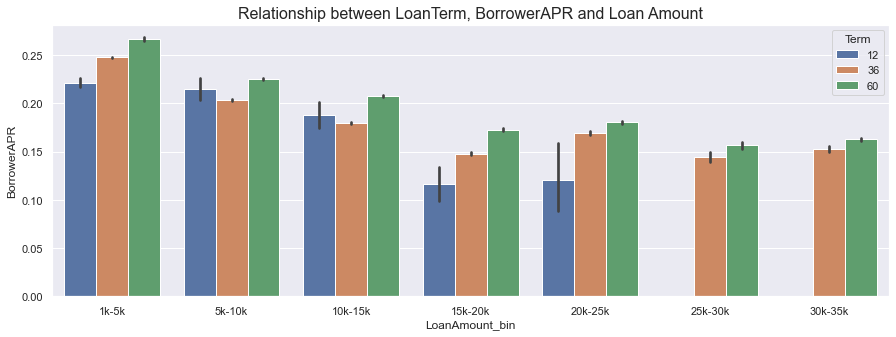

In [30]:
plt.figure(figsize = [15, 5])
fig = sns.barplot(data=loan_data_subset, x='LoanAmount_bin', y='BorrowerAPR', hue='Term')
fig.legend(title = 'Term', loc='upper right')
plt.title("Relationship between LoanTerm, BorrowerAPR and Loan Amount", fontsize=16)

Longer term loans have higher APRs, so looks like the loan term has an effect on the borrowerAPR.

## Conclusions

The major take away from this analysis is that BorrowerAPR has a huge effect on prosperRatings, the lower the APR the higher the ratings, longer term loans also result in an increase in BorrowerAPR, so it will be very beneficial to take short term loans so as to keep APR values as low as possible.

In [31]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 726193 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck_template.slides.html
Use Control-C to stop this server
^C

Interrupted
